# Unique Fractions

Based on a Reddit post: [Unique Fractions between 0 and 1 visualized -- Angle = Value of fraction, Radius = Denominator.](https://www.reddit.com/r/math/comments/8j5vjx/oc_ver_2_unique_fractions_between_0_and_1/).

Plot unique fractions between 0 and 1 on a polar plot.

```
θ = 2π*fraction
r = denominator
```

In [1]:
%matplotlib inline
import numpy as np
from math import pi
from math import gcd
from math import sqrt
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
def generate_fractions(n):
    if n == 0:
        return [(0, 1)]
    elif n == 1:
        return [(1, 1)]
    return np.array([(i, n) for i in range(1, n) if gcd(i, n) == 1])

print(generate_fractions(5))

[[1 5]
 [2 5]
 [3 5]
 [4 5]]


In [3]:
def generate_fractions_up_to(n):
    return np.concatenate([generate_fractions(i) for i in range(1, n+1)], axis=0)

print(generate_fractions_up_to(5))

[[1 1]
 [1 2]
 [1 3]
 [2 3]
 [1 4]
 [3 4]
 [1 5]
 [2 5]
 [3 5]
 [4 5]]


In [4]:
def generate_polar_coords(array):
    return np.array([(2*pi*num/denom, denom) for num, denom in array])
    
print(generate_polar_coords(generate_fractions_up_to(5)))

[[6.28318531 1.        ]
 [3.14159265 2.        ]
 [2.0943951  3.        ]
 [4.1887902  3.        ]
 [1.57079633 4.        ]
 [4.71238898 4.        ]
 [1.25663706 5.        ]
 [2.51327412 5.        ]
 [3.76991118 5.        ]
 [5.02654825 5.        ]]


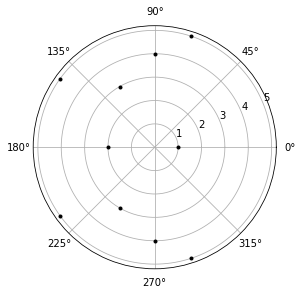

In [5]:
def polar_plot(points, *argv, scale=1):
    _, largest_radius = np.amax(points, axis=0)
    figsize = scale*sqrt(largest_radius)
    plt.figure(figsize=(figsize, figsize))
    plt.polar(points[:, 0], points[:, 1], *argv)
    plt.show()
    
polar_plot(generate_polar_coords(generate_fractions_up_to(5)), 'k.', scale=2)

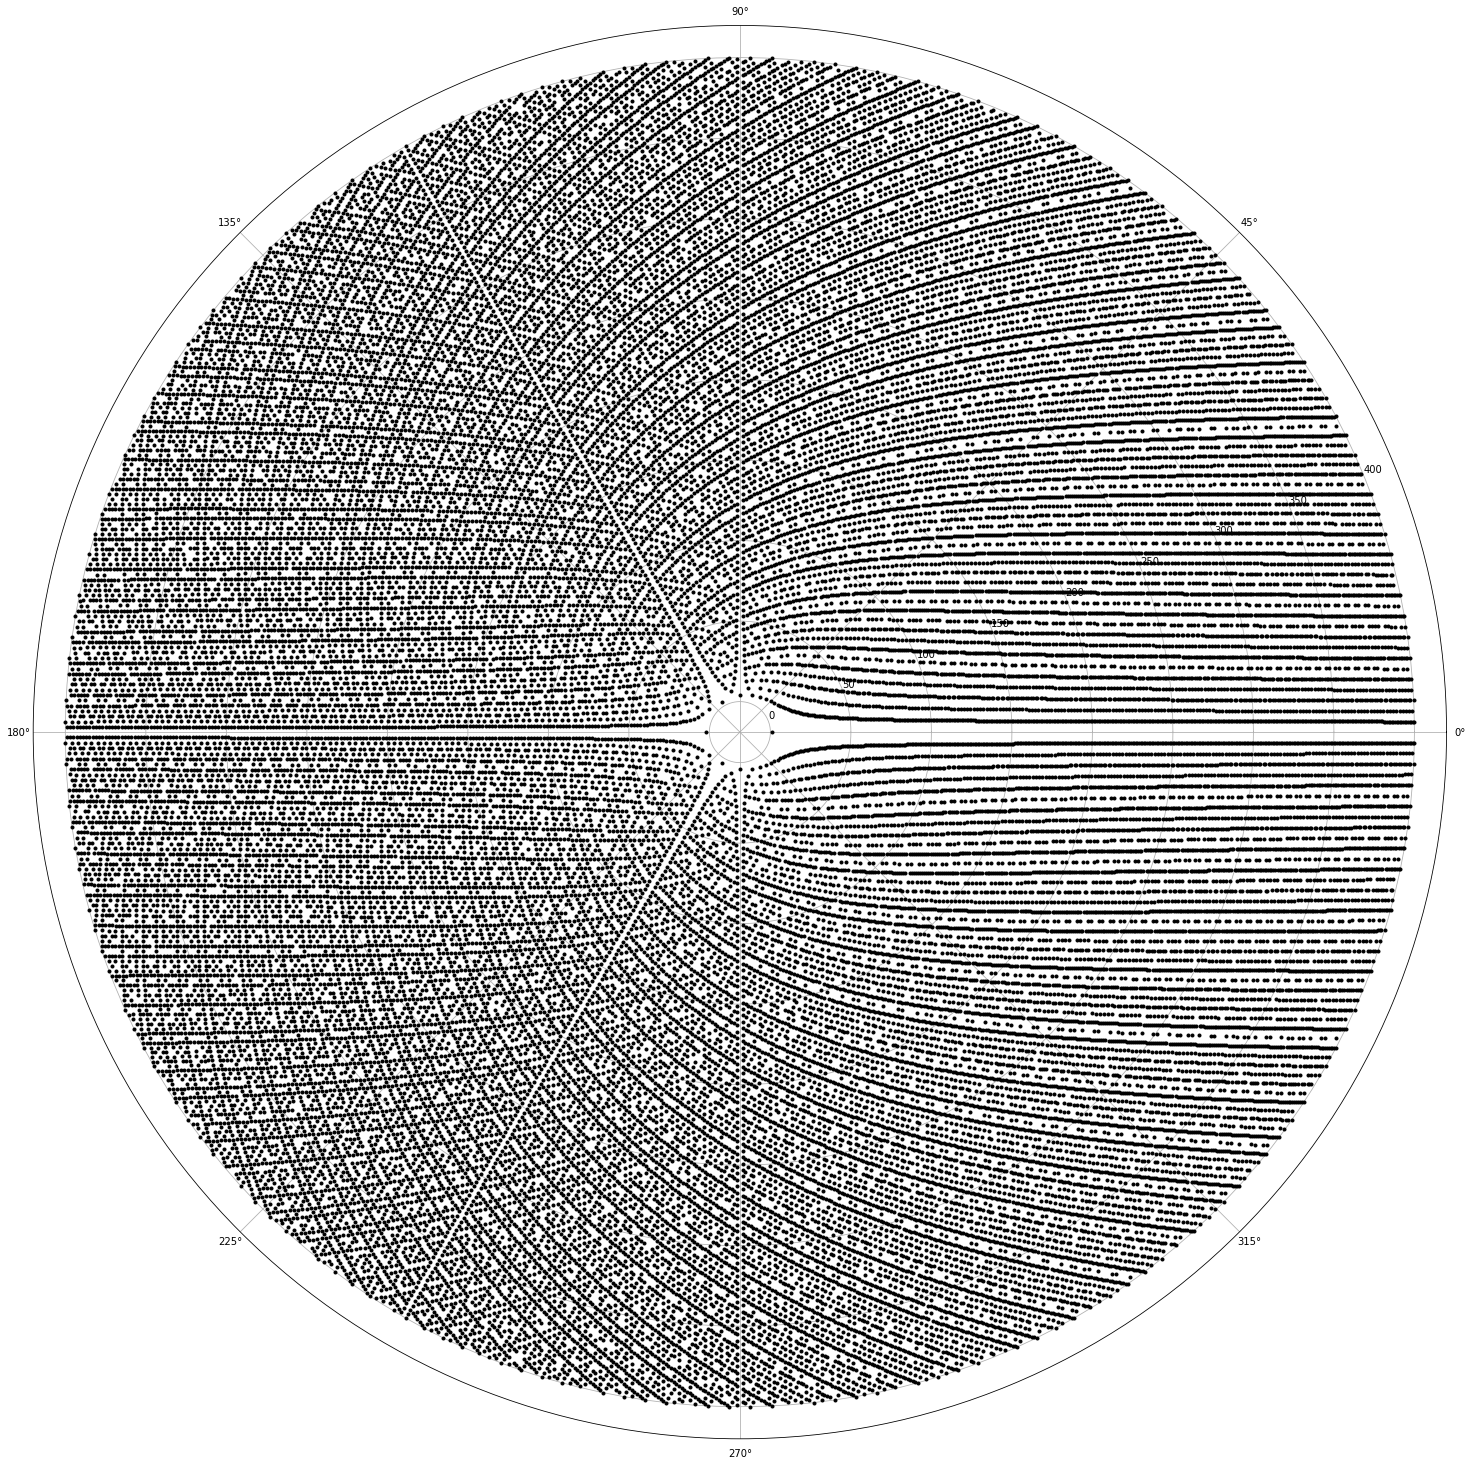

In [6]:
polar_plot(generate_polar_coords(generate_fractions_up_to(400)), 'k.', scale=1.3)